In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans, vq, whiten

In [22]:
df = pd.read_csv('E:/HDD Documents/HDD Documents/School/WGU/medical/medical_clean.csv')

In [23]:
df = df[['Age', 'Income','Initial_days', 'Additional_charges']]

In [24]:
df.isna().any()

Age                   False
Income                False
Initial_days          False
Additional_charges    False
dtype: bool

In [25]:
df.describe()

,Age,Income,Initial_days,Additional_charges
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,53.511700,40490.495160,34.455299,12934.528587
std,20.638538,28521.153293,26.309341,6542.601544
min,18.000000,154.080000,1.001981,3125.703000
25%,36.000000,19598.775000,7.896215,7986.487755
50%,53.000000,33768.420000,35.836244,11573.977735
75%,71.000000,54296.402500,61.161020,15626.490000
max,89.000000,207249.100000,71.981490,30566.070000


In [26]:
df.head()

,Age,Income,Initial_days,Additional_charges
0,53,86575.93,10.585770,17939.403420
1,51,46805.99,15.129562,17612.998120
2,53,14370.14,4.772177,17505.192460
3,78,39741.49,1.714879,12993.437350
4,22,1209.56,1.254807,3716.525786


In [27]:
#Normalize data and store it in a new variable
scaled_data = pd.DataFrame( data = whiten(obs = df, check_finite = True), columns = df.columns)
scaled_data

,Age,Income,Initial_days,Additional_charges
0,2.568140,3.035651,0.402378,2.742074
1,2.471229,1.641179,0.575093,2.692183
2,2.568140,0.503867,0.181396,2.675704
3,3.779526,1.393474,0.065185,1.986073
4,1.066020,0.042411,0.047697,0.568079
...,...,...,...,...
9995,1.211387,1.611783,1.959905,1.364608
9996,4.215626,0.525356,2.610163,4.357376
9997,2.180496,2.311306,2.666646,2.335764
9998,2.083585,1.041466,2.408273,1.189445


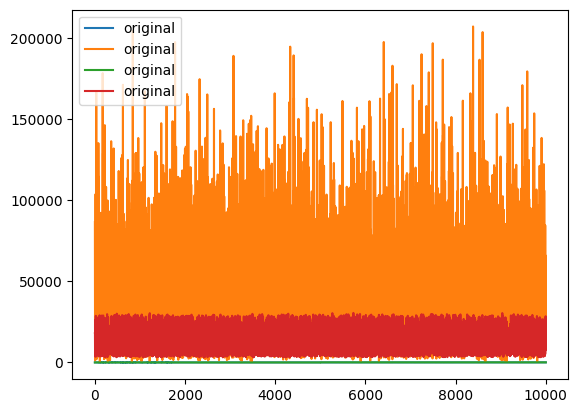

In [28]:
#Plot original data
plt.plot(df, label='original')
plt.legend()
plt.show()


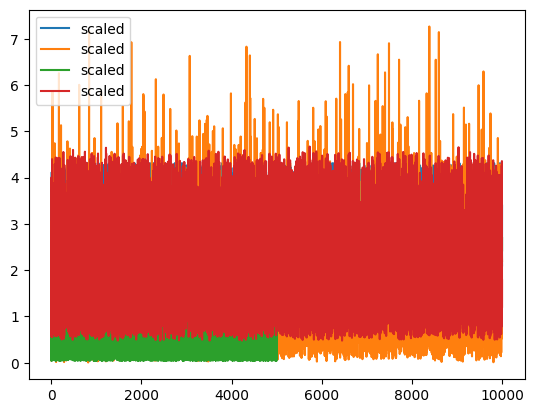

In [29]:
# Plot scaled data
plt.plot(scaled_data, label = 'scaled')
plt.legend()
plt.show()

In [30]:
#Sanity check to make sure the standard deviation is the same, aka the data is normalized
for i in scaled_data.columns:
    print([i, scaled_data[i].std()])

['Age', 1.0000500037503124]
['Income', 1.0000500037503124]
['Initial_days', 1.0000500037503124]
['Additional_charges', 1.0000500037503124]


In [31]:
scaled_data.describe()

,Age,Income,Initial_days,Additional_charges
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.592934,1.419736,1.309688,1.977069
std,1.000050,1.000050,1.000050,1.000050
min,0.872198,0.005403,0.038087,0.477770
25%,1.744397,0.687201,0.300145,1.220751
50%,2.568140,1.184037,1.362179,1.769106
75%,3.440338,1.903819,2.324805,2.388541
max,4.312537,7.266868,2.736104,4.672086


In [32]:
scaled_data.to_csv('E:/HDD Documents/HDD Documents/School/WGU/d212_data_mining_ii/scaled_data.csv')

In [33]:
# Compute cluster centers
kmeans_whiten = kmeans(obs = scaled_data, k_or_guess = 3, iter = 20, check_finite = True)
kmeans_whiten

(array([[1.9686636 , 1.44839158, 0.34351278, 1.38914134],
        [2.03313082, 1.40335292, 2.29085519, 1.43034277],
        [3.61660599, 1.40950871, 1.27997307, 2.95819213]]),
 1.3821627517482904)

In [34]:
# Generate cluster centers and labels
centroid_numeric, label_numeric = kmeans_whiten
code_numeric, dist_numeric = vq( obs = scaled_data, code_book = centroid_numeric, check_finite = True)
print(code_numeric)
print(dist_numeric)

[2 2 0 ... 1 1 1]
[2.13553255 1.39038739 1.71260773 ... 1.34428462 0.45312951 1.66172125]


In [37]:
# Find 5 clusters in the data
code_book, distortion = kmeans(scaled_data, 5)
print(code_book)


[[3.48467906 1.22109773 2.27255141 2.7633315 ]
 [1.80553511 1.12923784 0.34801621 1.28353172]
 [3.49234313 1.20040088 0.34824293 2.82192828]
 [2.46256428 3.51749186 1.15881899 1.74381588]
 [1.79705589 1.17044777 2.28007092 1.28066499]]


In [38]:
#Convert the codebook array to a dataframe for visualization
df_codebook = pd.DataFrame(code_book, columns = ['Age', 'Income', 'Initial_days', 'Additional_charges'])
print(df_codebook)

        Age    Income  Initial_days  Additional_charges
0  3.484679  1.221098      2.272551            2.763331
1  1.805535  1.129238      0.348016            1.283532
2  3.492343  1.200401      0.348243            2.821928
3  2.462564  3.517492      1.158819            1.743816
4  1.797056  1.170448      2.280071            1.280665


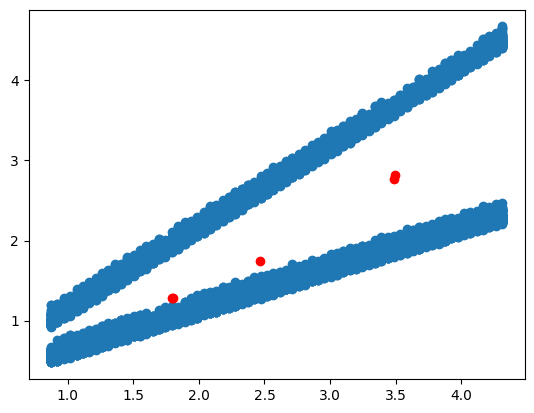

In [40]:
plt.scatter(scaled_data.iloc[:, 0], scaled_data.iloc[:, 3])
plt.scatter(df_codebook.iloc[:, 0], df_codebook.iloc[:, 3], c='r')
plt.show()

In [41]:
#Elbow method: Declaring variables for use
distortions = []
num_cluster = range(1, 10)

In [42]:
#Populating distortions for various clusters
for i in num_cluster:
    centoids, distortion = kmeans(scaled_data, i)
    distortions.append(distortion)

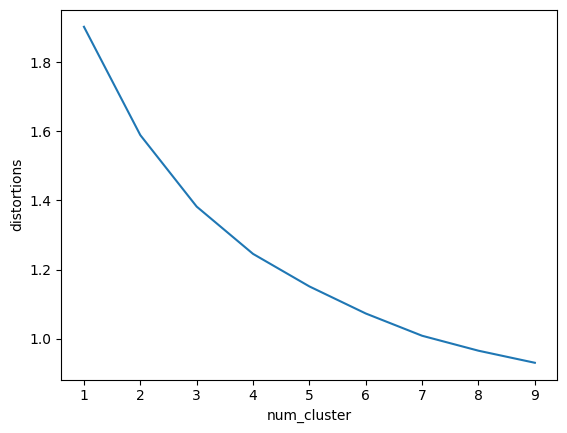

In [43]:
#Plotting elbow plot data
elbow_plot_data = pd.DataFrame({'num_cluster': num_cluster, 'distortions': distortions})
sns.lineplot(x = 'num_cluster', y = 'distortions', data = elbow_plot_data)
plt.show()